# Belastingen uit matroos

## 1. Voorbeeld met CSV
Lees de configuratie in:

Dit leest een configuratie bestand `belasting_matroos_config.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    BelastingMatroos:
        source: "observed"
        parameters: ["waterlevel"]

DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [1]:
from pathlib import Path

from toolbox_continu_inzicht import Config

test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "belasting_matroos_config.yaml")
c.lees_config()

Zet de data adapter klaar en geef deze de configuratie mee 

In [2]:
from toolbox_continu_inzicht import DataAdapter

data = DataAdapter(config=c)

Run de module met CSV

In [3]:
from toolbox_continu_inzicht.belastingen import BelastingMatroos

matroos = BelastingMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [4]:
matroos.df_in

In [5]:
ds = await matroos.run()

In [31]:
df = matroos.df_out

In [32]:
df_plot = df[df["objectid"] == "hoekvanholland"]

In [33]:
import numpy as np

from toolbox_continu_inzicht.utils.datetime_functions import datetime_from_epoch

values_nan = df_plot[df_plot["value"] == 999].index
for val in values_nan:
    df_plot.loc[val, "value"] = np.nan

df_plot = df_plot.set_index(df_plot["datetime"].apply(lambda x: datetime_from_epoch(x)))


<Axes: xlabel='datetime'>

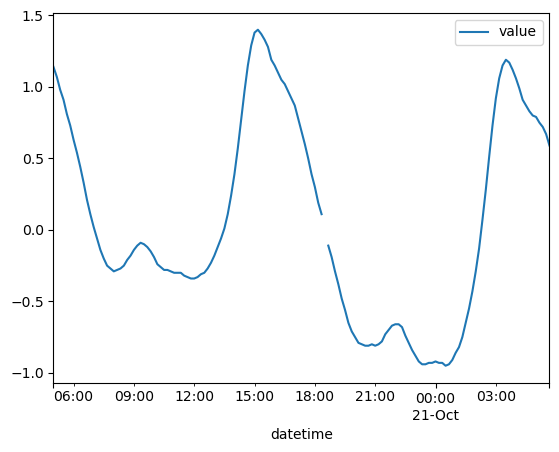

In [35]:
df_plot[["value"]].plot()

### Dit waren alleen metingen, herhaal nu met dataset met ook voorspellingen

Dit leest een configuratie bestand `belasting_matroos_config_fcst.yaml` in. 
```yaml
GlobalVariables:
    rootdir: "data_sets" 
    moments: [-24,0,24,48]  

    csv:
        delimiter: ","

    BelastingMatroos:
        source: "observed"
        parameters: ["waterlevel"]

DataAdapter: 
    BelastingLocaties: 
        type: csv
        path: "belastingen_matroos.csv"
    Waterstanden: 
        type: csv
        path: "waterstanden.csv"

```

In [23]:
test_data_sets_path = Path.cwd() / "data_sets"
c = Config(config_path=test_data_sets_path / "belasting_matroos_fcst_config.yaml")
c.lees_config()
data = DataAdapter(config=c)

matroos_fsct = BelastingMatroos(
    data_adapter=data, input="BelastingLocaties", output="Waterstanden"
)

In [24]:
await matroos_fsct.run()

In [27]:
df_fcst = matroos_fsct.df_out
df_plot_fcst = df_fcst[df_fcst["objectid"] == "hoekvanholland"]
values_nan = df_plot_fcst[df_plot_fcst["value"] == 999].index
for val in values_nan:
    df_plot_fcst.loc[val, "value"] = np.nan

df_plot_fcst = df_plot_fcst.set_index(df_plot_fcst["datetime"].apply(lambda x: datetime_from_epoch(x)))



<Axes: xlabel='datetime'>

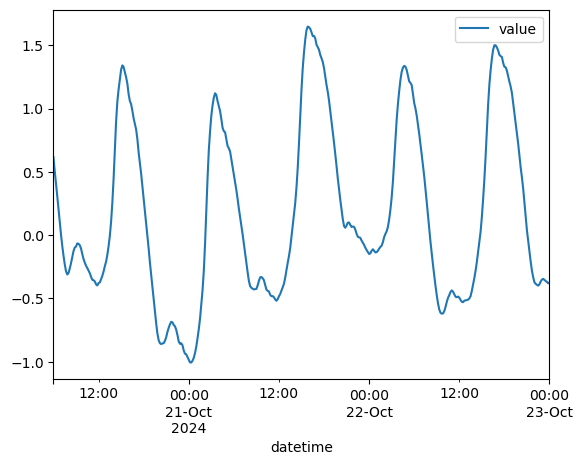

In [30]:
df_plot_fcst[["value"]].plot()

In [37]:
df_plot_fcst

,objectid,objecttype,parameterid,datetime,value,calculating,measurementcode
datetime,,,,,,,
2024-10-20 06:00:00+00:00,hoekvanholland,measuringstation,1,1.729404e+12,0.6150,True,dcsm_v6_kf_harmonie
2024-10-20 06:10:00+00:00,hoekvanholland,measuringstation,1,1.729405e+12,0.5068,True,dcsm_v6_kf_harmonie
2024-10-20 06:20:00+00:00,hoekvanholland,measuringstation,1,1.729405e+12,0.4119,True,dcsm_v6_kf_harmonie
2024-10-20 06:30:00+00:00,hoekvanholland,measuringstation,1,1.729406e+12,0.3112,True,dcsm_v6_kf_harmonie
2024-10-20 06:40:00+00:00,hoekvanholland,measuringstation,1,1.729406e+12,0.2078,True,dcsm_v6_kf_harmonie
...,...,...,...,...,...,...,...
2024-10-22 23:20:00+00:00,hoekvanholland,measuringstation,2,1.729639e+12,-0.3538,True,dcsm_v6_kf_harmonie
2024-10-22 23:30:00+00:00,hoekvanholland,measuringstation,2,1.729640e+12,-0.3620,True,dcsm_v6_kf_harmonie
2024-10-22 23:40:00+00:00,hoekvanholland,measuringstation,2,1.729640e+12,-0.3694,True,dcsm_v6_kf_harmonie


##### vergelijk de twee 

<Axes: xlabel='datetime'>

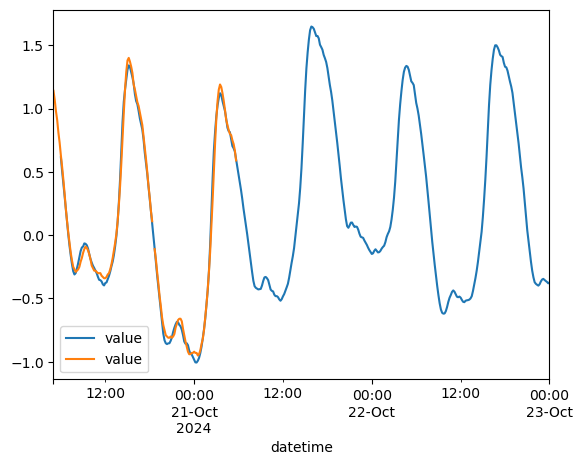

In [36]:
ax = df_plot_fcst[["value"]].plot()
df_plot[["value"]].plot(ax=ax)
ax.legend("")